In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Asja\Desktop\Housing.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.describe() #observing the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#drop extra/unwanted columns
df=df.drop(['id','lat', 'long', 'yr_renovated', 'zipcode', 'date'],axis=1)
df.head(30)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,2390,7570


In [5]:
#check the data type for each variable contained in the data set
print(df.dtypes)
df['price']=df['price'].astype(int)
df['yr_built']=pd.to_datetime(df['yr_built'])
print("**************************************")
print(df.dtypes)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
sqft_living15      int64
sqft_lot15         int64
dtype: object
**************************************
price                     int32
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [6]:
#check if the null values exist in the data set
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#check the number of unique values for each column in the data set, if they exist
df.nunique(dropna=False)

price            4029
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [8]:
#explore whether the data set contains outliers for each variable
outliers = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
print("Outliers detected using IQR method:\n", outliers)

Outliers detected using IQR method:
 {'price': 5        1225000
21       2000000
49       1350000
69       1325000
125      1450000
          ...   
21568    1700000
21576    3567000
21590    1222500
21597    1575000
21600    1537000
Name: price, Length: 1146, dtype: int32, 'bedrooms': 154      1
209      6
232      6
239      6
264      1
        ..
21375    6
21443    1
21519    1
21522    6
21552    1
Name: bedrooms, Length: 546, dtype: int64, 'bathrooms': 5        4.50
75       4.00
235      4.00
270      4.75
300      5.00
         ... 
21551    4.50
21561    4.00
21576    4.50
21593    3.75
21600    3.75
Name: bathrooms, Length: 571, dtype: float64, 'sqft_living': 5        5420
70       4770
115      4380
153      5180
239      4410
         ... 
21551    4350
21561    4500
21576    4850
21590    4910
21600    4470
Name: sqft_living, Length: 572, dtype: int64, 'sqft_lot': 5        101930
12        19901
21        44867
36        34848
41        24186
          ...  
21494     627

In [9]:
#if outliers are detected in the previous step, remove them from the data set for the purpose of making further analysis 
#I decided to only remove the outliers of the 'price' column but i could have used 
#numeric_df = df.select_dtypes(include=[float, int]) to include all relevant columns
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['price'] < Q1 - threshold * IQR) | (df['price'] > Q3 + threshold * IQR)]
df = df.drop(outliers.index)

In [10]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,231300,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1970-01-01 00:00:00.000001965,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1970-01-01 00:00:00.000001987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1970-01-01 00:00:00.000002009,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1970-01-01 00:00:00.000002014,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1970-01-01 00:00:00.000002009,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1970-01-01 00:00:00.000002004,1410,1287


Text(0, 0.5, 'The number of houses')

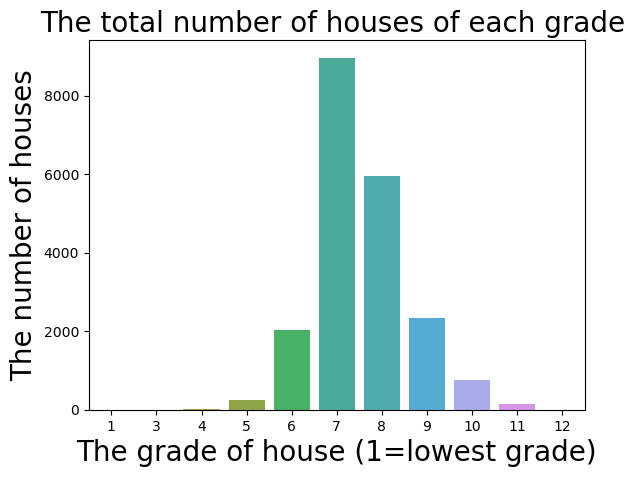

In [11]:
#f) Visualize at least two variables from the data
sns.countplot(data=df, x='grade')
plt.title('The total number of houses of each grade ',  fontsize = 20)
plt.xlabel('The grade of house (1=lowest grade)', fontsize = 20)
plt.ylabel('The number of houses', fontsize = 20)

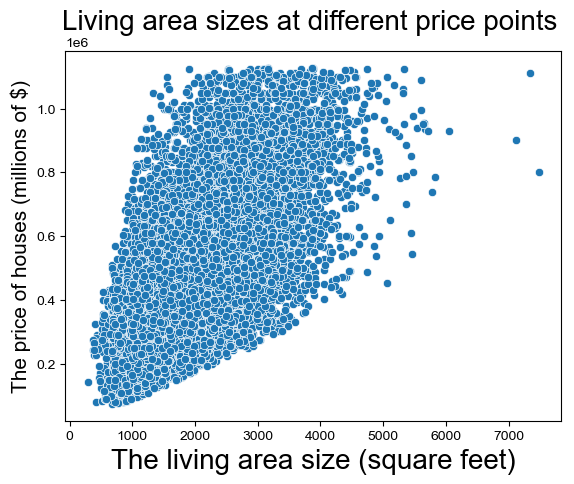

In [12]:
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Living area sizes at different price points ',  fontsize = 20)
plt.xlabel('The living area size (square feet)', fontsize = 20)
plt.ylabel('The price of houses (millions of $)', fontsize = 15)
sns.set_theme(style="darkgrid")

In [13]:
#g) Calculate basic descriptive statistics measures of central tendency and dispersion. Explain the obtained results.
print("The mean (average) price: %1.2f" % df['price'].mean())
print("The median (middle price) price: %1.2f" % statistics.median(df['price']))
print("The mode (most frequent) price: %1.2f" % statistics.mode(df['price']))

rangeOfPrice=df['price'].max()-df['price'].min()
print("The range of prices (the difference between the minimum and maximum price): %1.2f" % (df['price'].max()-df['price'].min()))
print("The variance (variability from the average/mean) of the price: %1.2f" % statistics.variance(df['price']))
print("The standard deviation (the square root of variance) of the price: %1.2f" % statistics.stdev(df['price']))

Q1_stats = df.quantile(0.25)
Q3_stats = df.quantile(0.75)
IQR_stats = Q3_stats - Q1_stats
print("The interquartile range (the distance between the first quartile and the third quartile) of the price: " + str(IQR_stats))

The mean (average) price: 476985.02
The median (middle price) price: 437500.00
The mode (most frequent) price: 450000.00
The range of prices (the difference between the minimum and maximum price): 1052500.00
The variance (variability from the average/mean) of the price: 43418352687.42
The standard deviation (the square root of variance) of the price: 208370.71
The interquartile range (the distance between the first quartile and the third quartile) of the price: price                             285000.0
bedrooms                               1.0
bathrooms                              1.0
sqft_living                         1031.0
sqft_lot                            5319.0
floors                                 1.0
waterfront                             0.0
view                                   0.0
condition                              1.0
grade                                  1.0
sqft_above                           930.0
sqft_basement                        510.0
yr_built         0

In [14]:
#h) Develop a linear regression model by choosing one dependent and one independent variable from the analyzed data set.
x=sm.add_constant(df['sqft_living'])
y=df['price']
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.294e+04
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        12:58:15   Log-Likelihood:            -2.7469e+05
No. Observations:               20467   AIC:                         5.494e+05
Df Residuals:                   20465   BIC:                         5.494e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.464e+05   3122.528     46.871      0.000     1.4e+05    1.52e+05
sqft_living   167.3596      1.471    113.737      0.000     164.475     170.244
==============================================================================
Omnibus:                      929.849   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.308
Skew:                           0.546   Prob(JB):                    5.72e-231
Kurtosis:                       3.226   Cond. No.                     5.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
'''i) Explain the slope and intercept from the developed regression model.
slope: 167.3596
The slope represents the rate at which the price of the property changes with respect to the living area size. 
For every additional 1 square foot of living area, the price of the property increases by approximately $167.36. 
Therefore, larger living areas cost more.

intercept: 1.464e+05 or 146400
the intercept represents the estimated price of the property when the living area size is zero square feet. 
It represents the baseline value from which the effect of the living area size (as determined by the slope) starts.
'''

'i) Explain the slope and intercept from the developed regression model.\nslope: 167.3596\nThe slope represents the rate at which the price of the property changes with respect to the living area size. \nFor every additional 1 square foot of living area, the price of the property increases by approximately $167.36. \nTherefore, larger living areas cost more.\n\nintercept: 1.464e+05 or 146400\nthe intercept represents the estimated price of the property when the living area size is zero square feet. \nIt represents the baseline value from which the effect of the living area size (as determined by the slope) starts.\n'

In [16]:
#j) Predict the future value of used dependent variable Y by using some value of independent variable X not contained in the data set.
slope= 167.3596 
intercept= 146400
x1=df['sqft_living']
yfunc=slope*x1+intercept

Text(0, 0.5, 'The price of houses (millions of $)')

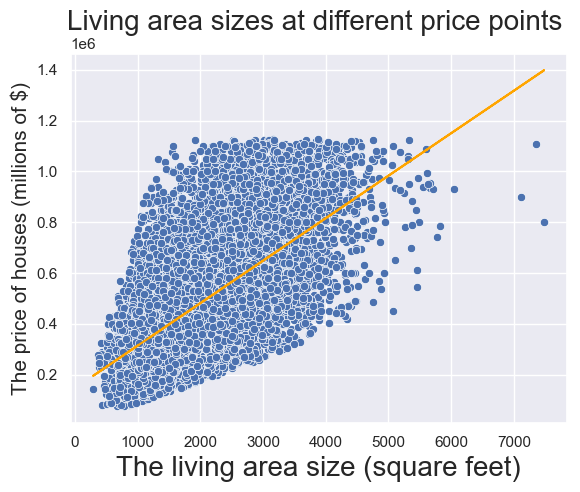

In [17]:
sns.scatterplot(data=df, x='sqft_living', y='price')
fig = plt.plot(x1,yfunc, c='orange', label = 'regression line')
plt.title('Living area sizes at different price points ',  fontsize = 20)
plt.xlabel('The living area size (square feet)', fontsize = 20)
plt.ylabel('The price of houses (millions of $)', fontsize = 15)

In [18]:
#checking if value is in the dataframe
result = df[df['sqft_living'] == 6000]
print(result)

new_x = 6000
predicted_y = slope*new_x+intercept

print(f"Predicted price for a lot size of {new_x} sqft_living: {predicted_y}")

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, sqft_living15, sqft_lot15]
Index: []
Predicted price for a lot size of 6000 sqft_living: 1150557.6


In [19]:
df.describe() #checking if the predicted y is reasonable and it seems like it is

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.046700e+04,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467,20467.000000,20467.000000
mean,4.769850e+05,3.329701,2.051632,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,1970-01-01 00:00:00.000001970,1922.255191,12447.084526
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1970-01-01 00:00:00.000001900,399.000000,651.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1970-01-01 00:00:00.000001951,1470.000000,5046.000000
50%,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1970-01-01 00:00:00.000001974,1800.000000,7542.000000
75%,6.000000e+05,4.000000,2.500000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1970-01-01 00:00:00.000001996,2280.000000,9883.500000
max,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,1970-01-01 00:00:00.000002015,5380.000000,871200.000000
std,2.083707e+05,0.912929,0.711906,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,NaN,614.932010,26538.592250
